#### PROBLEM STATEMENT
This project addresses a common business analytics challenge in the food service industry. The problem we are trying to solve here is predicting daily revenue for an ice cream business based on environmental factors. Specifically, we aim to establish a relationship between outside air temperature and daily sales revenue, helping business owners make data-driven decisions about inventory management and staffing.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
IceCream = pd.read_csv("IceCreamData.csv")

In [64]:
IceCream.head(100)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
95,9.018860,212.591740
96,20.265012,474.749392
97,19.363153,460.402500
98,14.685944,343.362905


In [65]:
IceCream.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [66]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [67]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


### VISUALIZING THE DATASET

##### Joint Plot Visualization of Temperature vs Revenue

Using Seaborn's `jointplot`, I create a  visualization that combines:
- A scatter plot showing the relationship between Temperature and Ice Cream Revenue
- Marginal distributions displayed as histograms for both variables

This helps us visualize if there's a correlation between temperature and ice cream sales.

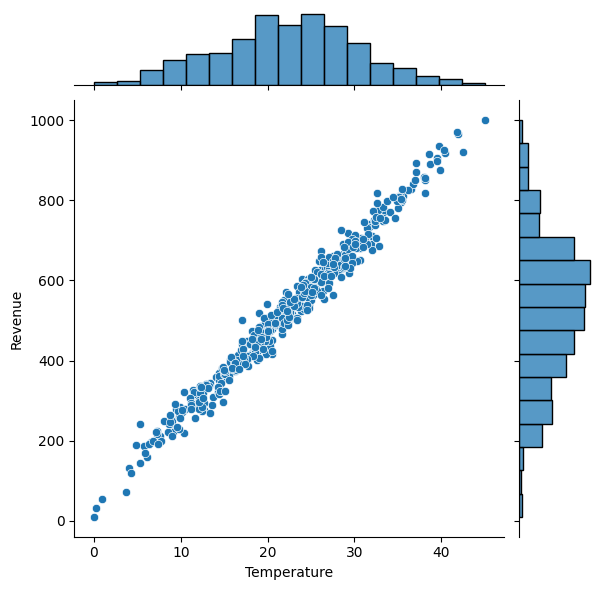

In [68]:
sns.jointplot(x='Temperature', y='Revenue', data = IceCream)

##### Pairplot Overview of Dataset Variables

I generate a grid of plots that shows:
- Scatter plots for all possible pairs of variables in our dataset
- Distribution plots (histograms) along the diagonal

This visualization helps us quickly examine relationships and distributions across all our variables simultaneously.

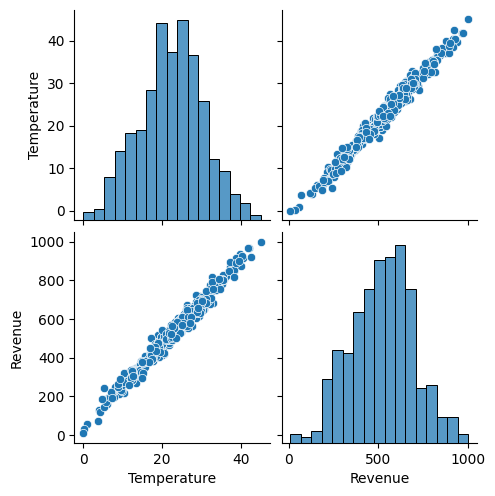

In [69]:
sns.pairplot(IceCream)

### Data Preparation for Machine Learning

First, we separate our data into dependent (target) and independent (feature) variables:
- `y`: Revenue - Our target variable we want to predict
- `x`: Temperature - Our feature variable used for prediction

We then install scikit-learn and use `train_test_split` to divide our data into training (75%) and testing (25%) sets. This split helps us evaluate our model's performance on unseen data.

In [70]:
y = IceCream['Revenue']
x = IceCream[['Temperature']]

In [71]:
pip install scikit-learn


Looking in indexes: https://nexus.corp.indeed.com/repository/pypi/simple

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### Linear Regression Model Creation

Using scikit-learn's LinearRegression:
1. We create a linear regression model with `fit_intercept=True` (allowing for a y-intercept)
2. Train the model using our training data (`x_train`, `y_train`)

This fits a linear equation to our data to establish the relationship between temperature and revenue.

In [74]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(x_train, y_train)

LinearRegression()

## Model Visualization and Prediction

The final step involves:
1. Using our trained model to make predictions on the test set
2. Creating a visualization that shows:
   - Actual training data points (red scatter points)
   - The fitted regression line (blue line)
   - Properly labeled axes and title

This plot helps us visually assess how well our linear regression model fits the training data.

In [75]:
y_predict = regressor.predict(x_test)
y_predict

array([582.22012636, 365.17006556, 294.25050828, 381.9129447 ,
       424.0206808 , 452.82465928, 765.84156649, 463.92377247,
       230.73769493, 411.40846169, 591.25332951, 590.20435521,
       185.72795548, 452.83129854, 721.16189084, 442.02185184,
       395.3600151 , 511.22051165, 330.90790853, 523.07576262,
       471.5378867 , 468.93546837, 627.90581223, 466.5684824 ,
       506.73994345, 445.43433752, 624.35766747, 182.5345213 ,
       444.7650081 , 593.89559259, 633.18931624, 394.4185221 ,
       683.51616392, 616.42855144, 663.64077252, 776.80112566,
       436.82818189, 484.9788067 , 431.6688571 , 863.46591091,
       945.6825295 , 790.03996012, 624.19662539, 698.31704695,
       703.20755433, 701.64722253, 454.72766355, 307.45085006,
       806.79519976, 531.76164339, 499.3485179 , 861.36156662,
       705.94463407, 571.10556941, 477.5585487 , 364.50704463,
       544.5109424 , 455.73848283, 503.17912931, 509.37036731,
       284.318866  , 623.92606369, 238.91641176, 572.04

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

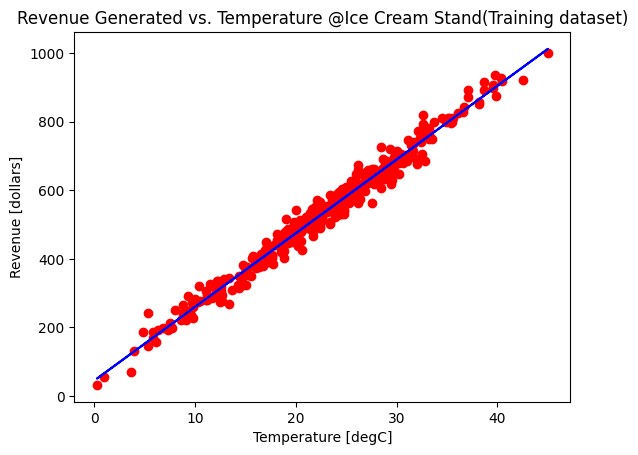

In [76]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')